In [16]:
#EDA based on the given data sets to derive business insights:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data1=pd.read_csv("Downloads/Customers.csv")
data1.columns #to know the columns of the dataset 

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [18]:
data2=pd.read_csv("Downloads/Products.csv")
data2.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [19]:
data3=pd.read_csv("Downloads/Transactions.csv")
data3.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [20]:
data1.info()
data2.info()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [21]:
data1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [22]:
#after knowing the structure of the csv data files we can now perform the actual analysis:

In [23]:
customers_path = "Downloads/Customers.csv"
products_path = "Downloads/Products.csv"
transactions_path = "Downloads/Transactions.csv"
customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

In [24]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left').merge(products_df, on='ProductID', how='left')
print(merged_df.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [25]:
region_sales = merged_df.groupby('Region')['TotalValue'].sum()
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
category_sales = merged_df.groupby('Category')['TotalValue'].sum()
repeat_customers = merged_df['CustomerID'].value_counts().loc[lambda x: x > 1].count()
monthly_sales = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

In [26]:
print(region_sales)

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


In [27]:
print(top_products)

ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [28]:
print(category_sales)

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [29]:
print(monthly_sales)

TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


In [30]:
print(repeat_customers)

187


C:\Users\SANIKA\AppData\Local\Temp\ipykernel_12872\1320294562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


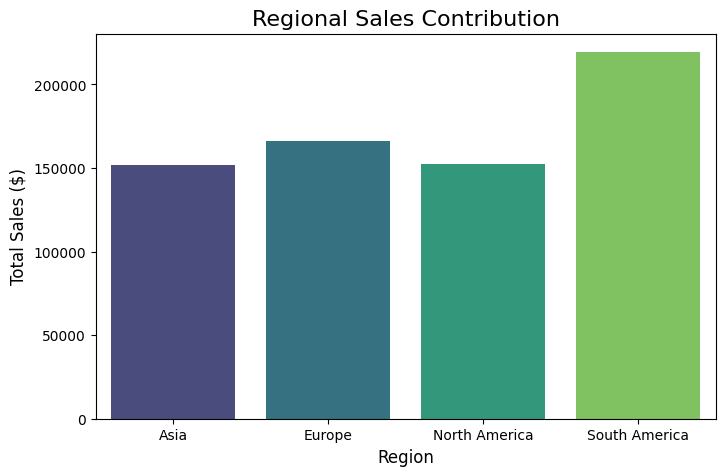

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Regional Sales Contribution", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.show()

C:\Users\SANIKA\AppData\Local\Temp\ipykernel_12872\560108320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="plasma")


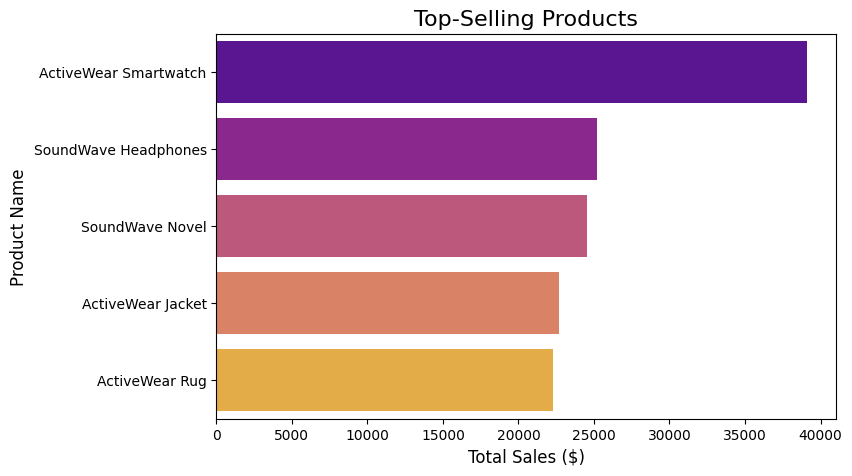

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="plasma")
plt.title("Top-Selling Products", fontsize=16)
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()

C:\Users\SANIKA\AppData\Local\Temp\ipykernel_12872\2630141548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")


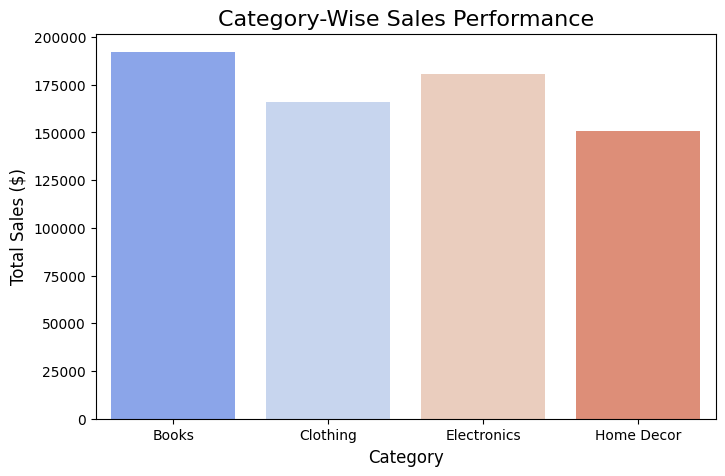

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")
plt.title("Category-Wise Sales Performance", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.show()

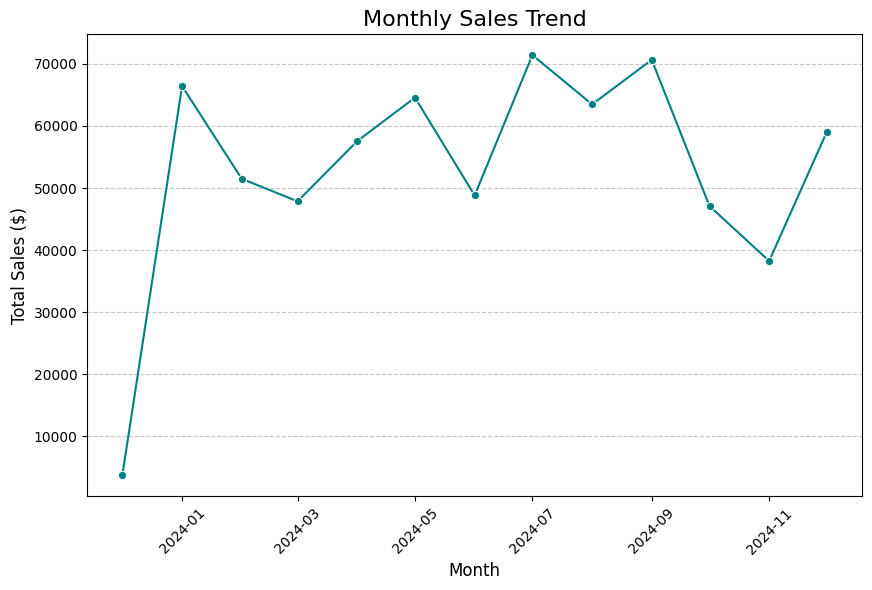

In [34]:
plt.figure(figsize=(10, 6))
monthly_sales.index = monthly_sales.index.to_timestamp()  # Convert PeriodIndex to Timestamp for plotting
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="teal")
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()